<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.029253,64.221923,64.299842,63.931443,0.005440,238.487901,238.483512,0.004389
1,0.0,1.0,92.783433,75.130526,43.675692,60.604979,-0.002388,282.192241,282.195646,-0.003405
2,0.0,2.0,40.082090,80.484175,30.747433,36.158890,-0.000284,197.472304,197.473119,-0.000815
3,0.0,3.0,41.506849,94.056966,62.829794,99.802821,-0.001606,308.194825,308.196558,-0.001733
4,0.0,4.0,52.165930,48.833189,69.862333,28.659384,0.002686,209.523522,209.522116,0.001406
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,52.059229,23.303020,60.526978,99.009228,0.012742,244.911197,244.898366,0.012831
59996,999.0,56.0,64.429284,84.977036,58.984197,20.867277,-0.000320,239.257473,239.257924,-0.000451
59997,999.0,57.0,96.522334,20.889281,91.194136,86.165635,-0.013127,304.758259,304.770399,-0.012140
59998,999.0,58.0,92.091278,35.643424,68.089639,91.741592,0.007693,297.573626,297.565142,0.008484


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.029253,64.221923,64.299842,63.931443,0.005440,238.487901,238.483512,0.004389
1,0.0,1.0,92.783433,75.130526,43.675692,60.604979,-0.002388,282.192241,282.195646,-0.003405
2,0.0,2.0,40.082090,80.484175,30.747433,36.158890,-0.000284,197.472304,197.473119,-0.000815
3,0.0,3.0,41.506849,94.056966,62.829794,99.802821,-0.001606,308.194825,308.196558,-0.001733
4,0.0,4.0,52.165930,48.833189,69.862333,28.659384,0.002686,209.523522,209.522116,0.001406
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,52.059229,23.303020,60.526978,99.009228,0.012742,244.911197,244.898366,0.012831
59996,999.0,56.0,64.429284,84.977036,58.984197,20.867277,-0.000320,239.257473,239.257924,-0.000451
59997,999.0,57.0,96.522334,20.889281,91.194136,86.165635,-0.013127,304.758259,304.770399,-0.012140
59998,999.0,58.0,92.091278,35.643424,68.089639,91.741592,0.007693,297.573626,297.565142,0.008484


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.029253,64.221923,64.299842,63.931443,0.005440,238.487901,238.483512,0.004389
1,0.0,1.0,92.783433,75.130526,43.675692,60.604979,-0.002388,282.192241,282.195646,-0.003405
2,0.0,2.0,40.082090,80.484175,30.747433,36.158890,-0.000284,197.472304,197.473119,-0.000815
3,0.0,3.0,41.506849,94.056966,62.829794,99.802821,-0.001606,308.194825,308.196558,-0.001733
4,0.0,4.0,52.165930,48.833189,69.862333,28.659384,0.002686,209.523522,209.522116,0.001406
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,52.059229,23.303020,60.526978,99.009228,0.012742,244.911197,244.898366,0.012831
59996,999.0,56.0,64.429284,84.977036,58.984197,20.867277,-0.000320,239.257473,239.257924,-0.000451
59997,999.0,57.0,96.522334,20.889281,91.194136,86.165635,-0.013127,304.758259,304.770399,-0.012140
59998,999.0,58.0,92.091278,35.643424,68.089639,91.741592,0.007693,297.573626,297.565142,0.008484


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

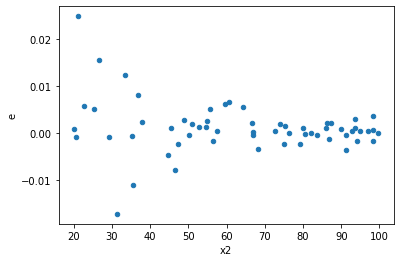

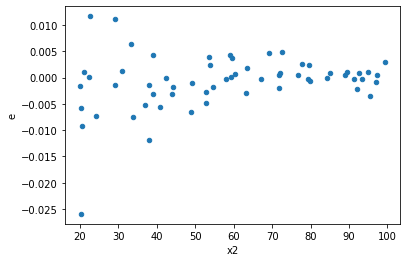

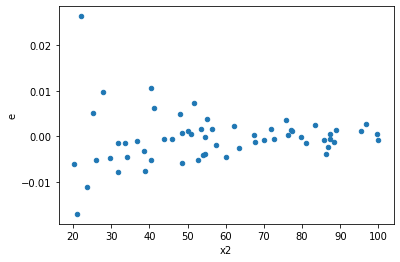

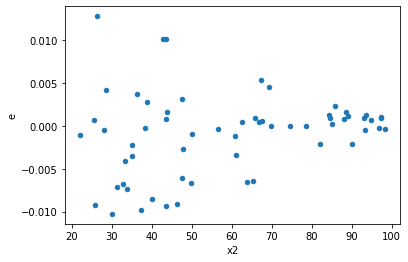

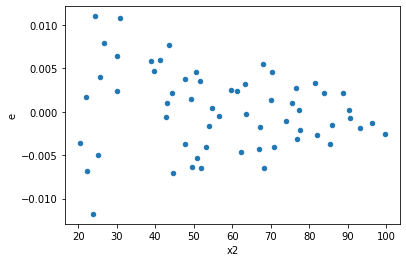

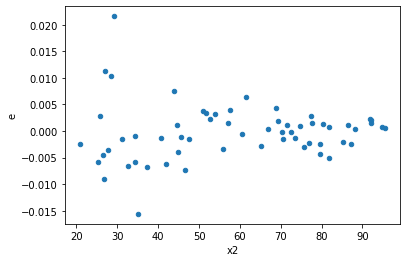

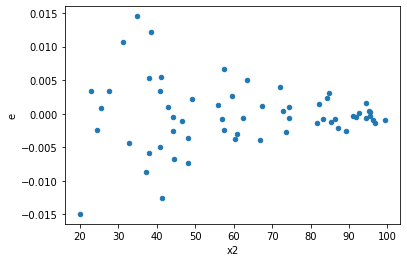

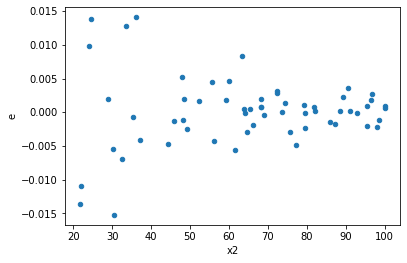

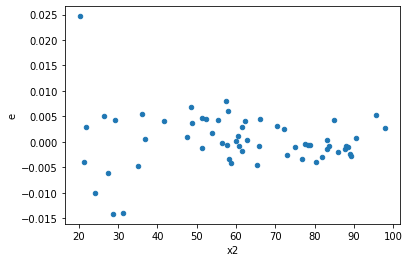

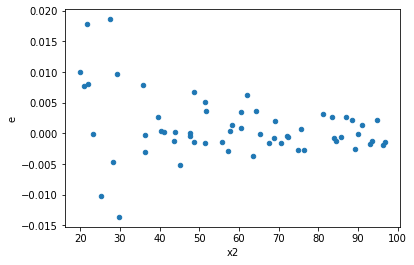

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.001459535601680973,5.1757891645106144e-05,7.297678008404864e-05,2.587894582255307e-06,0.03546189047084269,3.0859261562336314e-10,Reject001=0 : Heteroscedasticity
1.0,20.0,20.0,0.0011352234559711568,7.092171298356694e-05,5.676117279855784e-05,3.546085649178347e-06,0.06247379105014624,5.57301385748509e-08,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,0.001675863390478763,5.7348657511473904e-05,8.379316952393814e-05,2.867432875573695e-06,0.034220365357519066,2.208328250918616e-10,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,0.0009140205909760119,5.0139448481989246e-05,4.5701029548800596e-05,2.5069724240994622e-06,0.05485592882371414,1.7295536865106373e-08,Reject001=0 : Heteroscedasticity
4.0,20.0,20.0,0.0007236266312076355,0.00019372982729354586,3.6181331560381775e-05,9.686491364677293e-06,0.26772069868439863,0.004873973824972596,Reject001=0 : Heteroscedasticity
5.0,20.0,20.0,0.0012825057380048835,9.782793598743508e-05,6.412528690024418e-05,4.8913967993717545e-06,0.07627875111079041,3.2486742166183463e-07,Reject001=0 : Heteroscedasticity
6.0,20.0,20.0,0.0011181834292648414,2.4540476939555607e-05,5.5909171463242065e-05,1.2270238469777803e-06,0.02194673637373605,3.2285212907538757e-12,Reject001=0 : Heteroscedasticity
7.0,20.0,20.0,0.0013245578524608353,7.679358269061694e-05,6.622789262304177e-05,3.839679134530847e-06,0.05797676752883663,2.851039028603701e-08,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,0.001386139809043748,0.00013362862509864537,6.93069904521874e-05,6.681431254932268e-06,0.09640342498411565,2.416589997769416e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    996
Reject001=1 : Homoscedasticity        4
Name: Result_test, dtype: int64